In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv


<div style="background-color: #f0445e; padding: 25px; border-radius: 10px; font-size: 20px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Finding popularity of AirBnB over time</strong></h1>
</div>

<img src="https://www.digital.ink/wp-content/uploads/airbnb_logo_detail.jpg" width="5000" height="100"/>


<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Exploratory Data Analysis</strong></h1>
</div>

In [2]:
reviews_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv")

In [3]:
reviews_dict

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [4]:
Reviews = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv")

In [5]:
Reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [6]:
listings_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv")

In [7]:
listings_dict.head()

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based


<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Loading and Checking the dataset</strong></h1>
</div>

In [8]:
listings = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv",
                      encoding = "ISO-8859-1",low_memory = False)

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [12]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Information About the dataset</strong></h1>
</div>

In [13]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [14]:
listings["city"].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Columns and Rows Filtering</strong></h1>
</div>

In [15]:
paris_listings = listings.query("city == 'Paris'").loc[:,["host_since","neighbourhood","city","accommodates","price"]]

<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Paris City Data Analysis</strong></h1>
</div>

In [16]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [17]:
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [18]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [19]:
paris_listings.dropna(how = "any",inplace = True)

In [20]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Checking if there are missing values in the dataset</strong></h1>
</div>

In [21]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867584,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [22]:
paris_listings.describe(include = "object")

,neighbourhood,city
count,64657,64657
unique,20,1
top,Buttes-Montmartre,Paris
freq,7232,64657


In [23]:
paris_listings["accommodates"] == 0

0         False
1         False
2         False
3         False
4         False
          ...  
279707    False
279708    False
279709    False
279710    False
279711    False
Name: accommodates, Length: 64657, dtype: bool

In [24]:
(paris_listings["accommodates"] == 0).sum()

54

In [25]:
paris_listings[paris_listings["accommodates"] == 0].count(axis = 0)

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [26]:
paris_listings[paris_listings["price"] == 0].count(axis = 0)

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [27]:
paris_listings[(paris_listings["accommodates"] == 0) & (paris_listings["price"] == 0)].head()

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0


In [28]:
paris_listings[(paris_listings["accommodates"] != 0) & (paris_listings["price"] == 0)]

,host_since,neighbourhood,city,accommodates,price
207075,2019-07-22,Vaugirard,Paris,2,0
207076,2019-10-31,Enclos-St-Laurent,Paris,2,0
208301,2019-05-27,Palais-Bourbon,Paris,2,0
208302,2019-07-19,Pantheon,Paris,3,0
208854,2016-09-16,Louvre,Paris,3,0
208855,2019-11-06,Luxembourg,Paris,3,0
208856,2019-12-02,Elysee,Paris,3,0
208857,2019-12-17,Opera,Paris,2,0


In [29]:
paris_listings = paris_listings[paris_listings["price"] != 0]

In [30]:
paris_listings.describe()

,host_since,accommodates,price
count,64595,64595.000000,64595.000000
mean,2015-10-30 22:46:09.985293056,3.040483,113.213174
min,2008-08-30 00:00:00,1.000000,8.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-06 00:00:00,2.000000,80.000000
75%,2017-05-25 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.586691,214.553894


In [31]:
paris_listings[paris_listings["price"] == 0].count(axis = 0)

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Finding average Price of AirBnB in Paris as per Localities</strong></h1>
</div>

In [32]:
paris_listings_neighbourhood = paris_listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price",ascending = False)

In [33]:
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.373651
Louvre,175.754448
Passy,161.290875
Palais-Bourbon,157.514464
Luxembourg,155.794589
Bourse,149.633577
Hotel-de-Ville,144.515228
Temple,138.429300
Pantheon,122.983599


In [34]:
paris_listings_accommodates = paris_listings.groupby("accommodates").agg({"price":"mean"}).sort_values("price",ascending = False)

In [35]:
paris_listings_accommodates

,price
accommodates,
15,928.416667
12,821.434211
13,704.578947
14,699.230769
11,680.911765
16,677.060606
10,585.756219
9,381.900000
8,325.022440


In [36]:
elysee_listings_accommodates = paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price",ascending = False)

In [37]:
elysee_listings_accommodates

,price
accommodates,
14,971.000000
13,842.500000
11,805.000000
16,800.000000
12,529.625000
10,500.857143
9,440.272727
7,411.538462
8,405.518519


In [38]:
paris_listings["host_since"].nunique()

3854

<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Finding popularity of AirBnB over time</strong></h1>
</div>

In [39]:
paris_listings_over_time = paris_listings.set_index("host_since").resample("Y").agg({"neighbourhood" : "count", "price": "mean"})

In [40]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.373651
Louvre,175.754448
Passy,161.290875
Palais-Bourbon,157.514464
Luxembourg,155.794589
Bourse,149.633577
Hotel-de-Ville,144.515228
Temple,138.429300
Pantheon,122.983599


Text(0, 0.5, 'prominent places with airbnb')

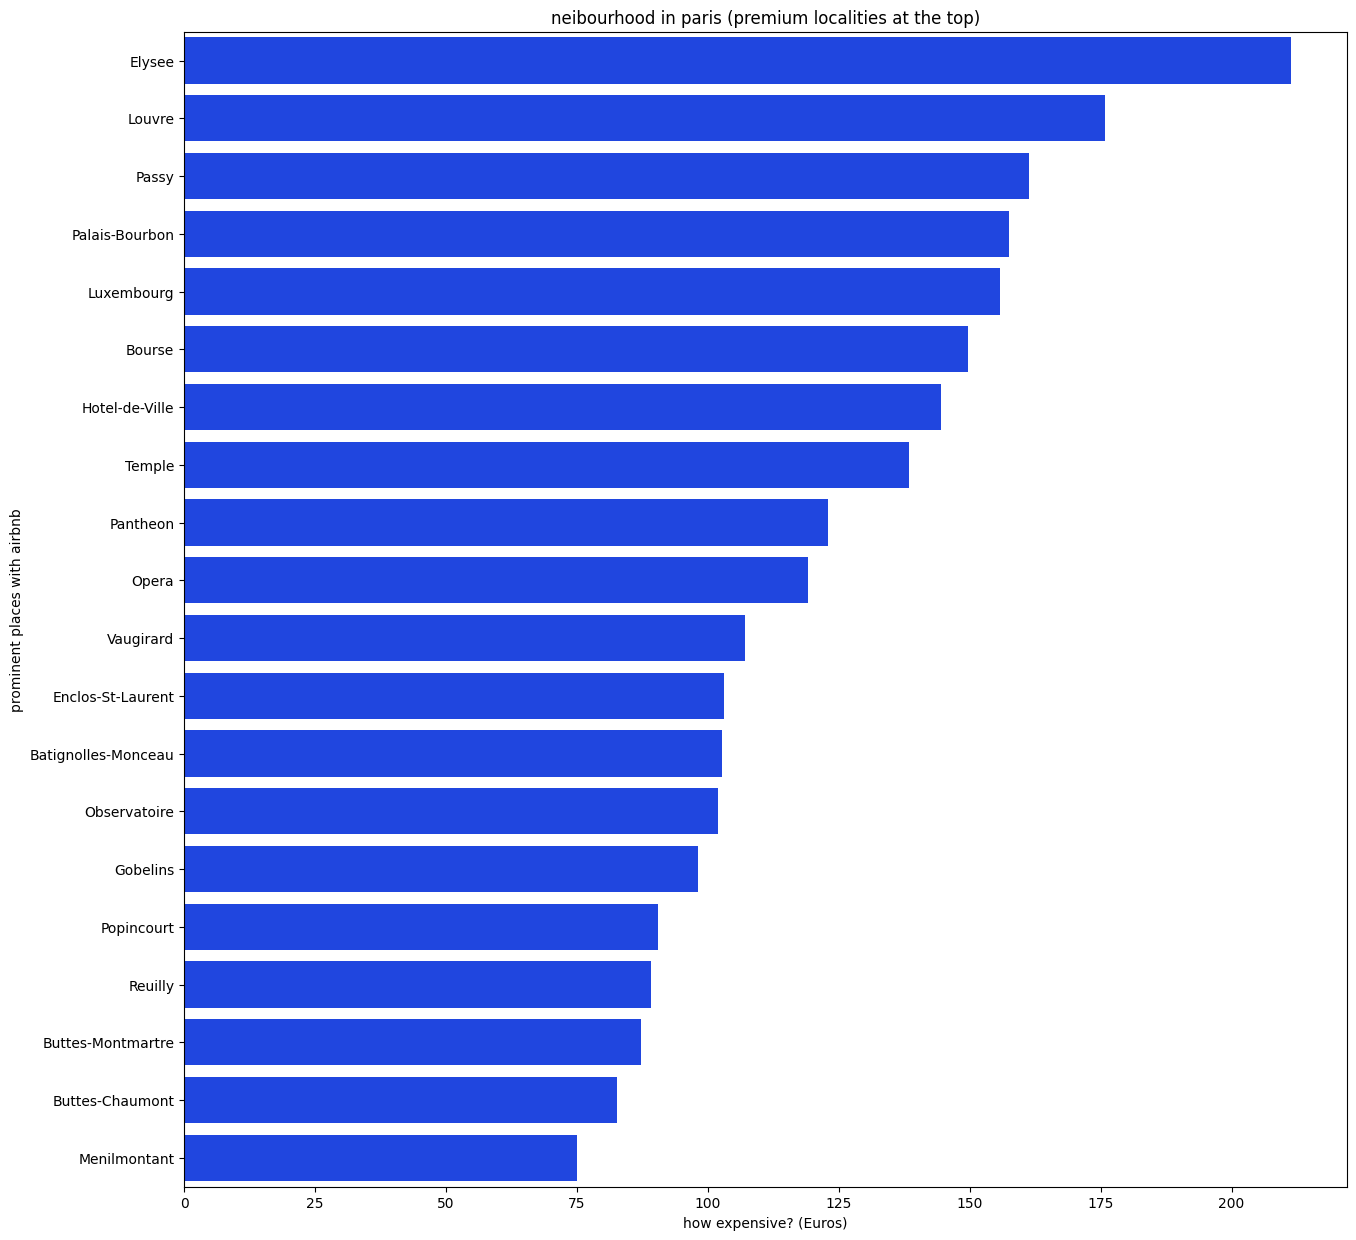

In [43]:
plt.figure(figsize = (15,15))
sns.barplot(data = paris_listings_neighbourhood,
           x = "price",
           y = paris_listings_neighbourhood.index,
           color = "#0033ff",
           orient = "h")
plt.title("neibourhood in paris (premium localities at the top)")
plt.xlabel("how expensive? (Euros)")
plt.ylabel("prominent places with airbnb")

Text(0, 0.5, 'number of people that can stay')

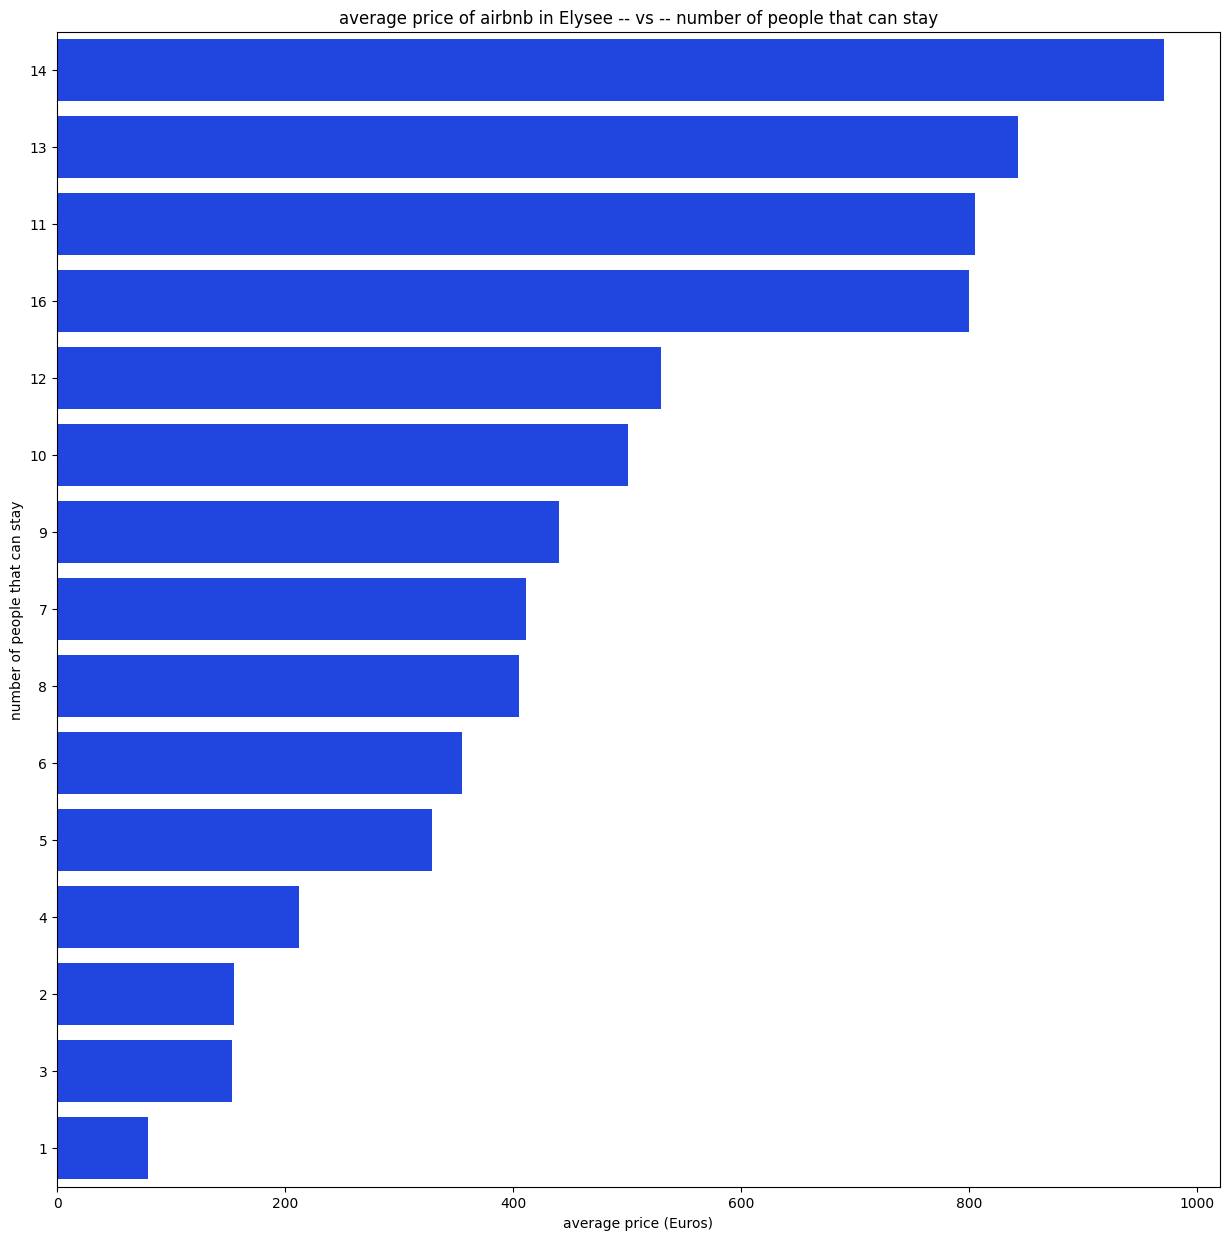

In [44]:
plt.figure(figsize = (15,15))
sns.barplot(data = elysee_listings_accommodates,
           x = "price",
           y = elysee_listings_accommodates.index,
           color = "#0033ff",
           orient = "h",
           order = elysee_listings_accommodates.index)
plt.title("average price of airbnb in Elysee -- vs -- number of people that can stay")
plt.xlabel("average price (Euros)")
plt.ylabel("number of people that can stay")

In [45]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


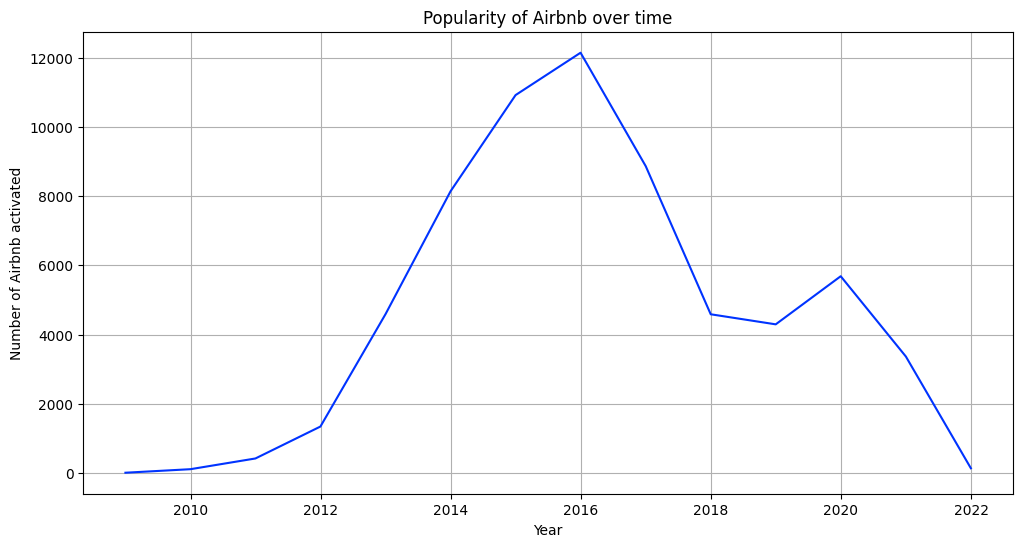

In [46]:
plt.figure(figsize = (12,6))
sns.lineplot(data = paris_listings_over_time["neighbourhood"],
           color = "#0033ff",
           )
plt.title("Popularity of Airbnb over time")
plt.xlabel("Year")
plt.ylabel("Number of Airbnb activated")
plt.grid()
plt.show()

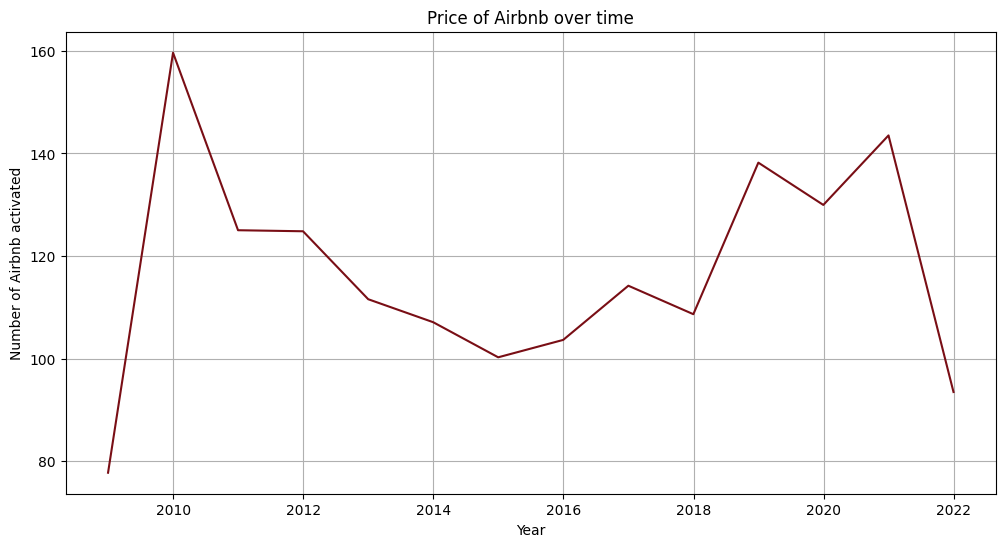

In [47]:
plt.figure(figsize = (12,6))
sns.lineplot(data = paris_listings_over_time["price"],
           color = "#790e15",
           )
plt.title("Price of Airbnb over time")
plt.xlabel("Year")
plt.ylabel("Number of Airbnb activated")
plt.grid()
plt.show()

<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Finding effects of Regulations on AirBnB Business</strong></h1>
</div>

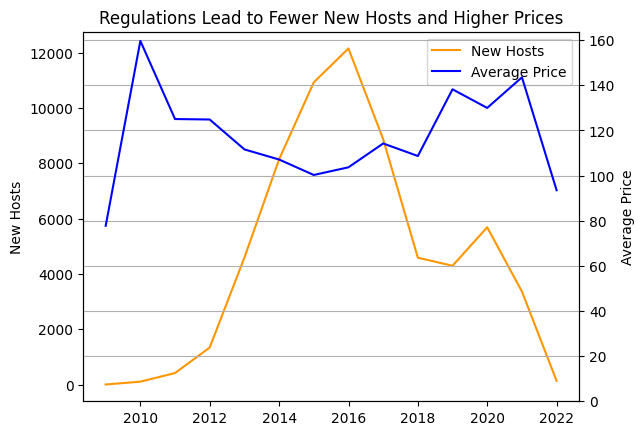

In [48]:
fig, ax = plt.subplots()

# Plot on the first axis
line1, = ax.plot(paris_listings_over_time.index, paris_listings_over_time["neighbourhood"], 
                 label="New Hosts", c="#ff9600")
ax.set_ylabel("New Hosts")

# Create a second y-axis
ax2 = ax.twinx()
line2, = ax2.plot(paris_listings_over_time.index, paris_listings_over_time["price"], 
                  label="Average Price", c="blue")
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

# Add a single combined legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc="upper right")  # You can change `loc` if needed

ax.set_title("Regulations Lead to Fewer New Hosts and Higher Prices")
plt.grid()
plt.show()


<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Final Insights</strong></h1>
</div>

1. The Number of AirBnBs kept on increasing since the launch and prices kept on increasing too, due to initial traction and early adopters.
 
2. After the startup is known to everyone and becomes a common utility, AirBnBs start increasing in numbers and prices also kept on decreasing.

3. After regulation was announced around 2015 there was under confidence in the business, number of  AirBnBs started decreasing and prices started increasing.

4. Once the regulation is the new normal, during the year 2019 the number of AirBnBs have increased in number and prices kept decreasing due to more supply of them.

<div style="background-color: #f0445e; padding: 15px; border-radius: 10px; font-size: 10px; font-weight: 10px; text-align: center;">
  <h1 style="color: #FFFFFF;"><strong>Recommendation for AirBnB</strong></h1>
</div>

1. Regulations in long term rentals can impact the business adversely, there might be customer and hosts churn due to uncertainty.

2. Such regulations might add to AirBnBs losses which might be difficult to recover later.

3. If the customer experience is going to get impacted due to this, it would lead to incorrect brand perception.

4. AirBnB can replicate such regulations at other places.

5.  It is recommended to watch out for any such regulations at other places and be prepared for it.
AirBnB can replicate such regulations at other places.

6. They can keep strict rules to onboard and release the hosts.

7. They can limit the number of AirBnBs in a locality to ensure the public has enough rental options and the government doesn't step in.